### Task 2

In [ ]:
import os

In [ ]:
path = "../input/cnn-data/output"

In [ ]:
labels =os.listdir(path) #Getting all tha labels

In [ ]:
d = {}
for x in labels :
    d[x] = len(os.listdir(path+'/'+ x)) # No of images in each label

In [ ]:
len(d) #Total nuumbber of classes

28

In [ ]:
d

{'27.0': 349,
 '2.0': 83,
 '8.0': 350,
 '13.0': 92,
 '21.0': 349,
 '20.0': 350,
 '14.0': 37,
 '16.0': 86,
 '12.0': 43,
 '3.0': 73,
 '24.0': 60,
 '15.0': 31,
 '17.0': 27,
 '9.0': 141,
 '0.0': 68,
 '6.0': 157,
 '11.0': 70,
 '28.0': 138,
 '19.0': 140,
 '5.0': 80,
 '7.0': 71,
 '22.0': 109,
 '1.0': 73,
 '4.0': 350,
 '23.0': 69,
 '25.0': 155,
 '26.0': 10,
 '18.0': 41}

In [ ]:
# Importing all the required libraries and modules

import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf


2021-09-28 13:37:15.639107: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [ ]:

filenames = os.listdir("../input/cnn-data/output") # Loading files name 


In [ ]:
# Creating a data frame

files = []
categories = []
for filename in filenames:
    
    file  = "../input/cnn-data/output/" + filename
    
    for x in os.listdir(file):
        p = file +"//"+ x
        files.append(p)
        categories.append(filename)
#         print(filename,p)
    
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,../input/cnn-data/output/27.0//173.png,27.0
1,../input/cnn-data/output/27.0//248.png,27.0
2,../input/cnn-data/output/27.0//94.png,27.0
3,../input/cnn-data/output/27.0//236.png,27.0
4,../input/cnn-data/output/27.0//340.png,27.0


In [ ]:
FAST_RUN = False   #Given image size is 224*224 so for ease of use for augmentation we fix standard image width and height. 
IMAGE_WIDTH=256
IMAGE_HEIGHT=256

In [ ]:
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback



In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import layers

In [ ]:
import tensorflow as tf

In [ ]:

# Creating a identity block contains of conv layer , activation layer , and batch normal layer
def identity_block(input_tensor, kernel_size, filters):
    
    filters1, filters2, filters3 = filters
    
    

    x = Conv2D(filters1,1)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation(tf.keras.layers.LeakyReLU(alpha=0.3))(x)

    x = Conv2D(filters2, kernel_size,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(tf.keras.layers.LeakyReLU(alpha=0.3))(x)

    x = Conv2D(filters3, 1)(x)
    x = BatchNormalization()(x)

    x = layers.add([x, input_tensor])
    x = Activation(tf.keras.layers.LeakyReLU(alpha=0.3))(x)
    return x

In [ ]:
import tensorflow as tf

In [ ]:
# Creating a conv block and having resnet connection with the output of conv block

def conv_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    
    
    filters1, filters2, filters3 = filters

    x = Conv2D(filters1, 1, strides=strides)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation(tf.keras.layers.LeakyReLU(alpha=0.3))(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(tf.keras.layers.LeakyReLU(alpha=0.3))(x)

    x = Conv2D(filters3,1)(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(filters3,  1, strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = Activation(tf.keras.layers.LeakyReLU(alpha=0.3))(x)
    return x

In [ ]:
inputs = Input(shape=(224,224,1))

x = ZeroPadding2D((3, 3))(inputs)
x = Conv2D(64, (7, 7), strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Activation(tf.keras.layers.LeakyReLU(alpha=0.3))(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

x = conv_block(x, 3, [64, 64, 256],  strides=(1, 1))
x = identity_block(x, 3, [64, 64, 256] )
x = identity_block(x, 3, [64, 64, 256])

x = conv_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])

x = conv_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])

x = conv_block(x, 3, [512, 512, 2048])
x = identity_block(x, 3, [512, 512, 2048])
x = identity_block(x, 3, [512, 512, 2048])

x = AveragePooling2D((7, 7))(x)

   
x = Flatten()(x)
x = Dense(28, activation='softmax')(x)

resmodel = Model(inputs, x)
resmodel.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

2021-09-28 13:37:20.544287: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-28 13:37:20.547341: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-28 13:37:20.588135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 13:37:20.588750: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-28 13:37:20.588813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-28 13:37:20.616619: I tensorflow/stream_executor/platform/def

In [ ]:
resmodel.summary()#Summary of the model

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
______________________________________________________________________________________________

<AxesSubplot:>

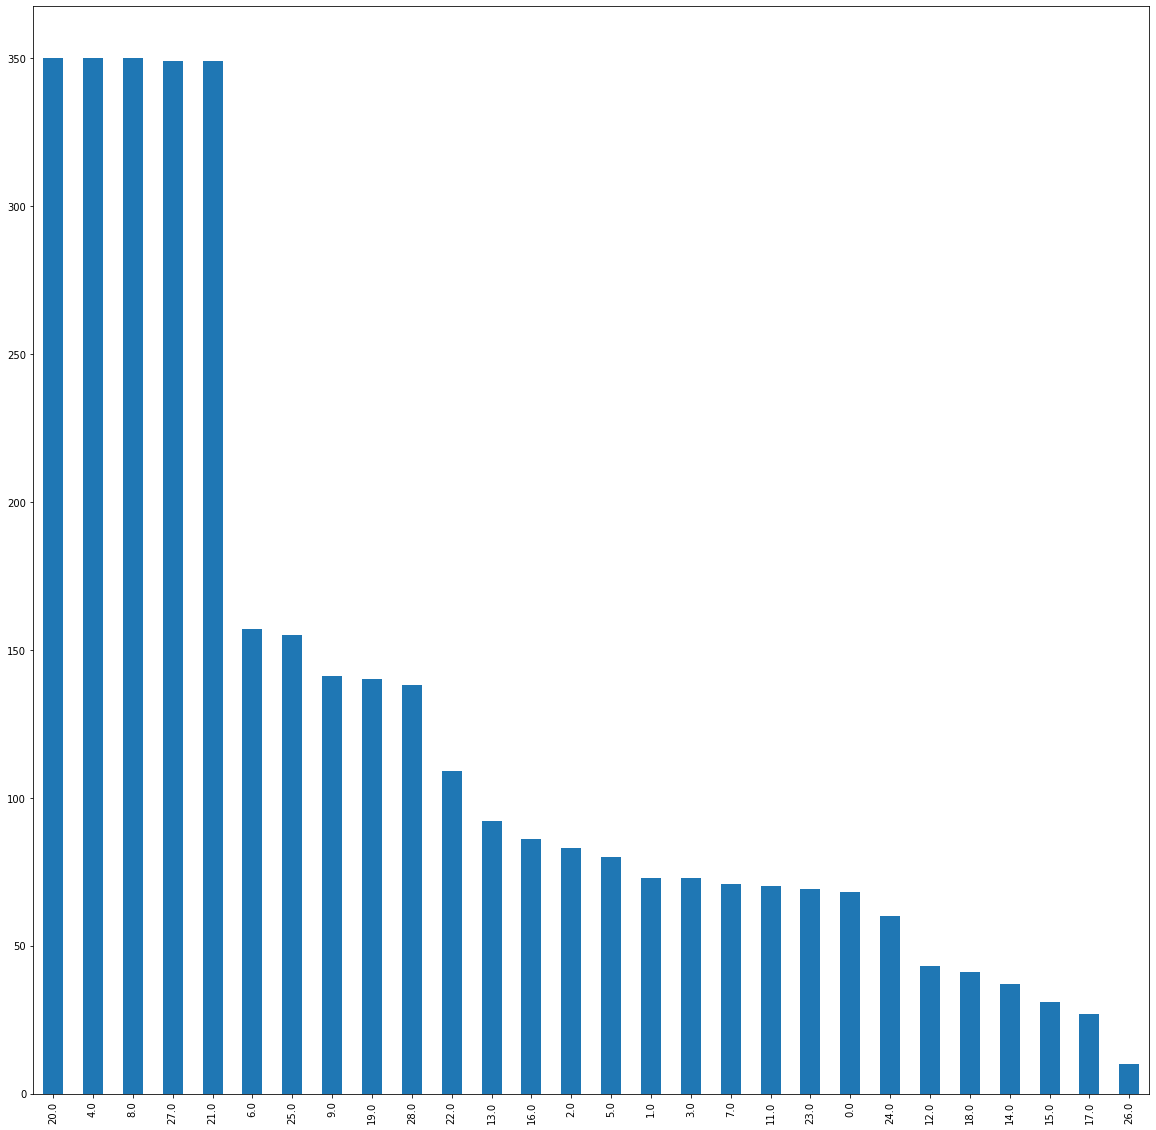

In [ ]:
from sklearn.model_selection import train_test_split #Simple plot of No of Images vs Class Labels
df = df.sample(frac = 1)

plt.figure(figsize = (20,20))
df['category'].value_counts().plot.bar()

In [ ]:
total_train = df.shape[0]  
total_validate = df.shape[0]
batch_size = 64

## Image Data Generator Concept keras :https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c

In [ ]:
# Image data generators 

t_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,                 #Adding augmentation techniques like rotation_range,rescale,shear_range etc
    width_shift_range=0.1,
    height_shift_range=0.1
)

t_generator = t_datagen.flow_from_dataframe(
    df, 
    color_mode="grayscale",
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=batch_size
)


Found 3602 validated image filenames belonging to 28 classes.


Refernce for augmentation techniques : https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [ ]:
t_generator.class_indices   #Putting class indices in Training Generator

{'0.0': 0,
 '1.0': 1,
 '11.0': 2,
 '12.0': 3,
 '13.0': 4,
 '14.0': 5,
 '15.0': 6,
 '16.0': 7,
 '17.0': 8,
 '18.0': 9,
 '19.0': 10,
 '2.0': 11,
 '20.0': 12,
 '21.0': 13,
 '22.0': 14,
 '23.0': 15,
 '24.0': 16,
 '25.0': 17,
 '26.0': 18,
 '27.0': 19,
 '28.0': 20,
 '3.0': 21,
 '4.0': 22,
 '5.0': 23,
 '6.0': 24,
 '7.0': 25,
 '8.0': 26,
 '9.0': 27}

In [ ]:
len(d)

28

In [ ]:
d = t_generator.class_indices


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau  # Saving only best models and weights.
red = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

In [ ]:
# Model training for 600 epochs

epochs=600
modelhistory = resmodel.fit(
    t_generator, 
    epochs=epochs,
    
    steps_per_epoch=len(df)//batch_size,callbacks=[red, checkpoint])
    


2021-09-28 13:37:27.203087: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-28 13:37:27.207455: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000175000 Hz


Epoch 1/600


2021-09-28 13:37:31.631105: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-28 13:37:32.494971: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-28 13:37:32.798300: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


56/56 [==============================] - 67s 992ms/step - loss: 4.7429 - accuracy: 0.0863
Epoch 2/600
56/56 [==============================] - 29s 507ms/step - loss: 3.1508 - accuracy: 0.1026
Epoch 3/600
56/56 [==============================] - 29s 509ms/step - loss: 3.0960 - accuracy: 0.1073
Epoch 4/600
56/56 [==============================] - 29s 508ms/step - loss: 3.0783 - accuracy: 0.1030
Epoch 5/600
56/56 [==============================] - 28s 503ms/step - loss: 3.0482 - accuracy: 0.1180
Epoch 6/600
56/56 [==============================] - 29s 507ms/step - loss: 3.0256 - accuracy: 0.1213
Epoch 7/600
56/56 [==============================] - 28s 495ms/step - loss: 3.0484 - accuracy: 0.1049
Epoch 8/600
56/56 [==============================] - 29s 509ms/step - loss: 3.0278 - accuracy: 0.1239
Epoch 9/600
56/56 [==============================] - 29s 509ms/step - loss: 3.0111 - accuracy: 0.1245
Epoch 10/600
56/56 [==============================] - 28s 505ms/step - loss: 2.9886 - accuracy

In [ ]:
resmodel.save_weights("/kaggle/working/task2resnet50(w).h5")
resmodel.save("/kaggle/working/task2resnet50(m).h5")     #Saving best model and its corresponding weights 